# Kodekladd

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import (
    PolynomialFeatures,
)
from functions import runge, MSE, R2, OLS_parameters

In [2]:
#Analysis fixed number of data points, varying polynomial degree

n = 100

np.random.seed(42)

x = np.linspace(-1,1, n).reshape(-1,1)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_offset = y_train.mean()

degrees = range(1,16)

mse_test_list_1 = []
mse_train_list = []

r2_test_list_1 = []
r2_train_list = []

theta = []

for p in degrees:
    poly = PolynomialFeatures(degree=p)
    scaler = StandardScaler()
    X_train = poly.fit_transform(x_train)
    X_test = poly.fit_transform(x_test)
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    beta = OLS_parameters(X_train_s, y_train)
    theta.append(beta)
    y_test_tilde = X_test_s @ beta + y_offset
    y_train_tilde = X_train_s @ beta + y_offset
    # plt.plot(x, scaler.transform(poly.fit_transform(x)) @ beta + y_offset, label=f'predicted p={p}')
    # plt.plot(x, y, 'o', label='data')
    # plt.plot(x, runge(x), label='runge function')
    # plt.legend()
    # plt.show()

    mse_test = MSE(y_test, y_test_tilde)
    mse_train = MSE(y_train, y_train_tilde)
    mse_test_list_1.append(mse_test)
    mse_train_list.append(mse_train)

    r2_test = R2(y_test, y_test_tilde)
    r2_train = R2(y_train, y_train_tilde)
    r2_test_list_1.append(r2_test)
    r2_train_list.append(r2_train)

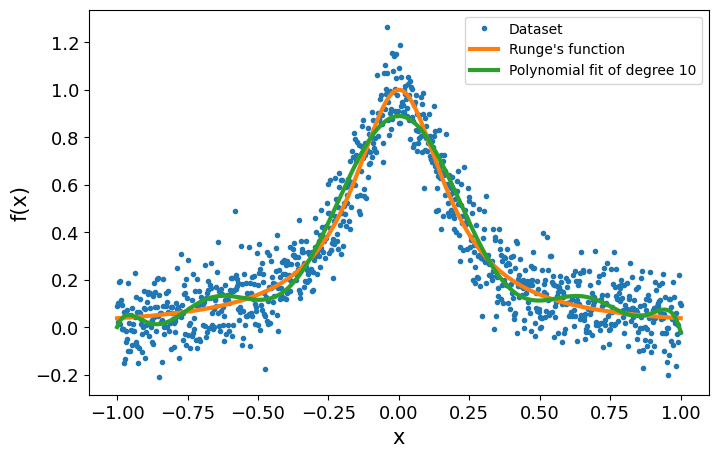

In [3]:
#Analysis increasing number of data points, same procedure as before

n = 1000

np.random.seed(42)

x = np.linspace(-1,1, n).reshape(-1,1)
y = runge(x) + 0.1*np.random.normal(0,1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_offset = y_train.mean()
degrees = range(1,16)

mse_test_list_2 = []
mse_train_list = []

r2_test_list_2 = []
r2_train_list = []

theta = []

for p in degrees:
    poly = PolynomialFeatures(degree=p)
    scaler = StandardScaler()
    X_train = poly.fit_transform(x_train)
    X_test = poly.fit_transform(x_test)
    scaler.fit(X_train)
    X_train_s = scaler.transform(X_train)
    X_test_s = scaler.transform(X_test)
    beta = OLS_parameters(X_train_s, y_train)
    theta.append(beta)
    y_test_tilde = X_test_s @ beta + y_offset
    y_train_tilde = X_train_s @ beta + y_offset
    if p == 10:
        plt.figure(figsize=(8, 5))
        plt.plot(x, y, 'o', label='Dataset', markersize=3)
        plt.plot(x, runge(x), label='Runge\'s function', linewidth=3)
        plt.plot(x, scaler.transform(poly.fit_transform(x)) @ beta + y_train.mean(), label=f'Polynomial fit of degree {p}', linewidth=3)
        plt.xlabel('x', fontsize=15)
        plt.ylabel('f(x)', fontsize=15)
        plt.tick_params(axis='both', labelsize=13)
        plt.legend(fontsize=10)
        plt.savefig("polynomial_fit_ols.png", dpi=300, bbox_inches='tight')
        plt.show()
    # plt.plot(x, y, 'o', label='data')
    # plt.plot(x, runge(x), label='runge function')
    # plt.plot(x, scaler.transform(poly.fit_transform(x)) @ beta + y_train.mean(), label=f'predicted p={p}')
    # plt.legend()
    # plt.show()

    mse_test = MSE(y_test, y_test_tilde)
    mse_train = MSE(y_train, y_train_tilde)
    mse_test_list_2.append(mse_test)
    mse_train_list.append(mse_train)

    r2_test = R2(y_test, y_test_tilde)
    r2_train = R2(y_train, y_train_tilde)
    r2_test_list_2.append(r2_test)
    r2_train_list.append(r2_train)

# plt.figure(figsize=(8, 5))
# plt.plot(degrees, mse_test_list, label='Test MSE', marker='o')
# plt.plot(degrees, mse_train_list, label='Train MSE', marker='o')

# plt.xlabel('Polynomial Degree')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.legend()
# plt.show()


# plt.figure(figsize=(8, 5))
# plt.plot(degrees, r2_test_list, label='Test R2', marker='o')
# plt.plot(degrees, r2_train_list, label='Train R2', marker='o')

# plt.xlabel('Polynomial Degree')
# plt.ylabel('R2 Score')
# plt.legend()
# plt.show()

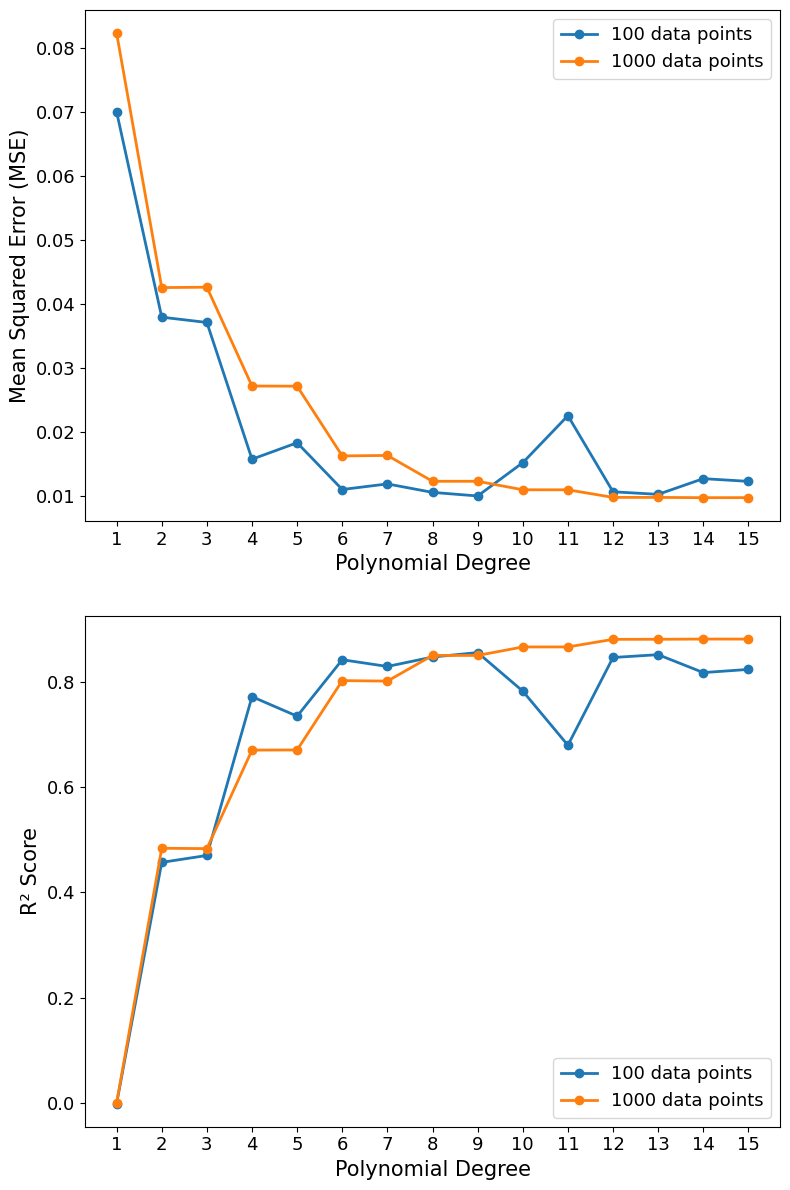

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(8, 12))

# MSE plot
axs[0].plot(degrees, mse_test_list_1, label='100 data points', marker='o', linewidth=2)
axs[0].plot(degrees, mse_test_list_2, label='1000 data points', marker='o', linewidth=2)
axs[0].set_xlabel('Polynomial Degree', fontsize=15)
axs[0].set_ylabel('Mean Squared Error (MSE)', fontsize=15)
axs[0].set_xticks(degrees)
axs[0].tick_params(axis='both', labelsize=13)
axs[0].legend(fontsize=13)

# R2 plot
axs[1].plot(degrees, r2_test_list_1, label='100 data points', marker='o', linewidth=2)
axs[1].plot(degrees, r2_test_list_2, label='1000 data points', marker='o', linewidth=2)
axs[1].set_xlabel('Polynomial Degree', fontsize=15)
axs[1].set_ylabel('R² Score', fontsize=15)
axs[1].set_xticks(degrees)
axs[1].tick_params(axis='both', labelsize=13)
axs[1].legend(fontsize=13, loc='lower right')

plt.tight_layout(h_pad=3.0)  # Increase vertical space between plots
plt.savefig("mse_r2_vs_degree_ols.png", dpi=300, bbox_inches='tight')
plt.show()

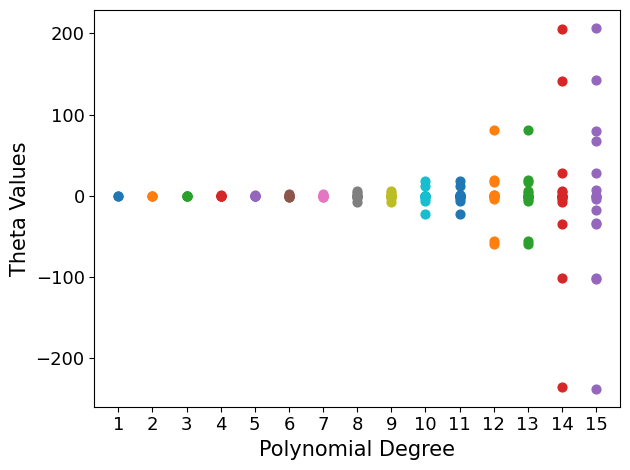

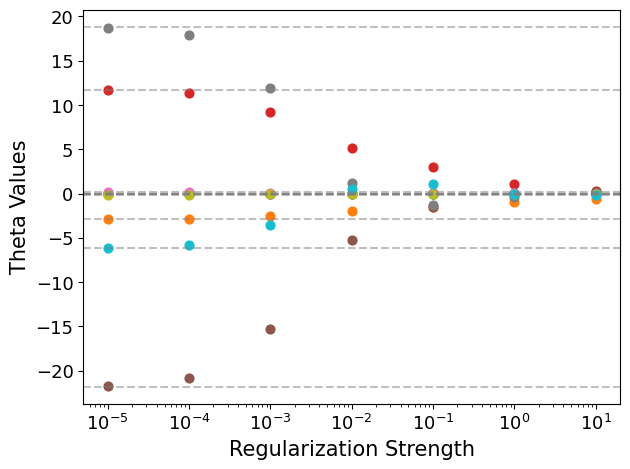

In [13]:
import numpy as np

# Combine all arrays in theta into a single 1D numpy array

theta_combined_ols = []

for t, deg in zip(theta, degrees):
    if deg == 10:
        theta_ols_deg10 = t.flatten()
    theta_combined_ols.append(t.flatten())
    plt.scatter([deg]*len(t), t, alpha=1, s=40)

plt.xlabel('Polynomial Degree', fontsize=15)
plt.ylabel('Theta Values', fontsize=15)
plt.xticks(list(degrees))
plt.tick_params(axis='both', labelsize=13)
plt.tight_layout()
plt.savefig("theta_values_ols.png", dpi=300, bbox_inches='tight')
plt.show()

theta_ridge = np.load("theta_ridge.npy", allow_pickle=True)
lambdas = np.logspace(-5,1,7)

# for t, l in zip(theta_ridge, lambdas):
#     plt.scatter([l]*len(t), t, alpha=1, s=40)

b0 = theta_ridge[:,0]
b1 = theta_ridge[:,1]
b2 = theta_ridge[:,2]
b3 = theta_ridge[:,3]
b4 = theta_ridge[:,4]
b5 = theta_ridge[:,5]
b6 = theta_ridge[:,6]
b7 = theta_ridge[:,7]
b8 = theta_ridge[:,8]
b9 = theta_ridge[:,9]
b10 = theta_ridge[:,10]

plt.scatter(lambdas, b1, alpha=1, s=40)
plt.scatter(lambdas, b2, alpha=1, s=40)
plt.scatter(lambdas, b3, alpha=1, s=40)
plt.scatter(lambdas, b4, alpha=1, s=40)
plt.scatter(lambdas, b5, alpha=1, s=40)
plt.scatter(lambdas, b6, alpha=1, s=40)
plt.scatter(lambdas, b7, alpha=1, s=40)
plt.scatter(lambdas, b8, alpha=1, s=40)
plt.scatter(lambdas, b9, alpha=1, s=40)
plt.scatter(lambdas, b10, alpha=1, s=40)

for i, val in enumerate(theta_ols_deg10):
    plt.axhline(y=val, color='gray', linestyle='--', alpha=0.5, label='OLS degree=10' if i == 0 else "")
plt.xlabel('Regularization Strength', fontsize=15)
plt.ylabel('Theta Values', fontsize=15)
plt.xticks(list(lambdas))
plt.xscale('log')
plt.tick_params(axis='both', labelsize=13)
plt.tight_layout()
plt.savefig("theta_values_ridge.png", dpi=300, bbox_inches='tight')
plt.show()